In [ ]:
https://hourlypricing.comed.com

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

import urllib.request
import json
#import numpy as np
from datetime import datetime,tzinfo,timezone,timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy
import sklearn

ModuleNotFoundError: No module named 'sklearn'

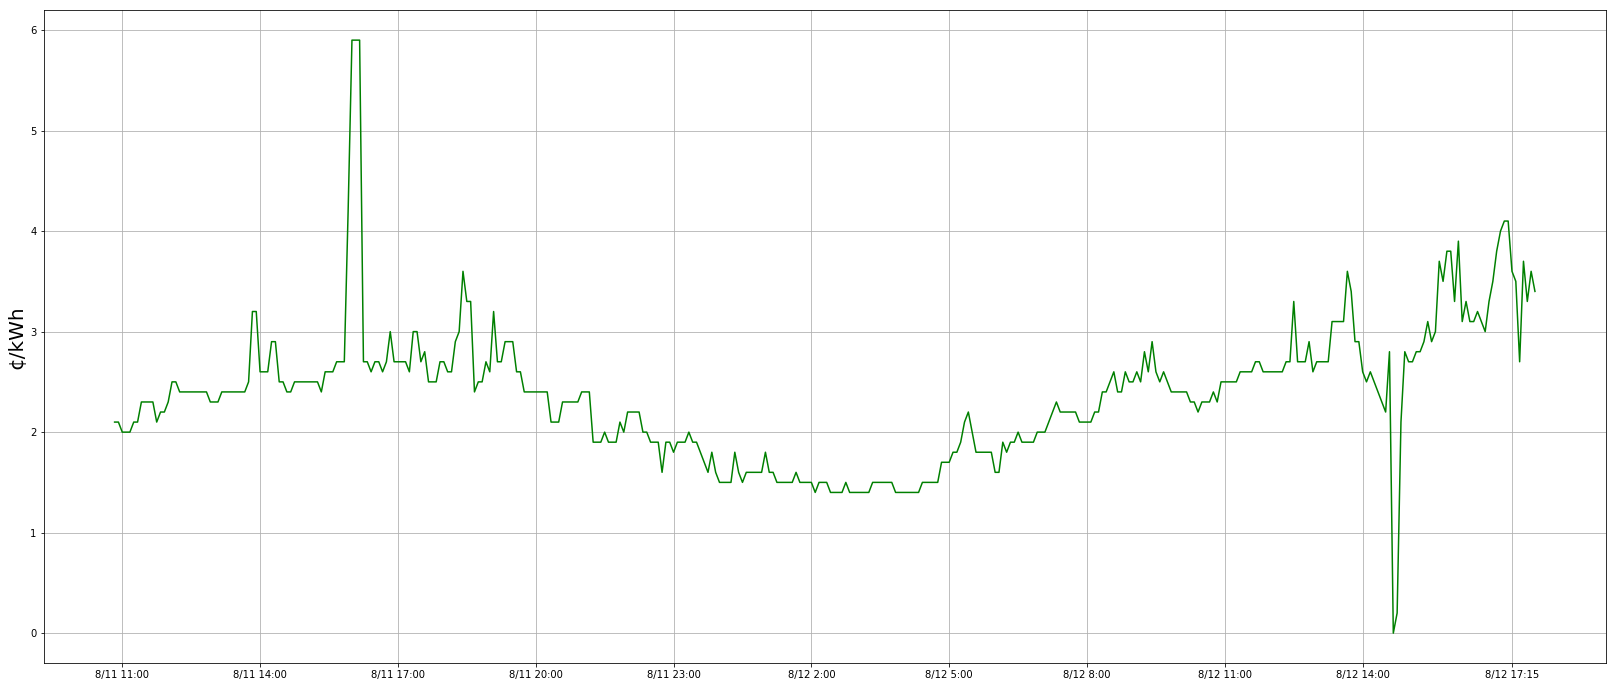

In [4]:
def utc_2_cst_str(millis):
    utcOffset = 0 # i think fromtimestamp assumes UTC and converts to local, so no offset?
    dttm = datetime.fromtimestamp(millis)+timedelta(hours=utcOffset)
    return '{}/{} {}:{:02}'.format(dttm.month,dttm.day, dttm.hour, dttm.minute)

startOffsetHrs = 36
endOffsetHrs = -8 #only returns historical numbers with most recent about 10minutes old...

feedType = '5minutefeed'
nowUtc = datetime.utcnow()
tmNow = nowUtc-timedelta(hours=endOffsetHrs)
tmStrt = nowUtc-timedelta(hours=startOffsetHrs)

dateStart = '{}{:02}{:02}{:02}{:02}'.format(tmStrt.year,tmStrt.month,tmStrt.day,tmStrt.hour,tmStrt.minute)
dateEnd = '{}{:02}{:02}{:02}{:02}'.format(tmNow.year,tmNow.month,tmNow.day,tmNow.hour,tmNow.minute)


pricingUrl='https://hourlypricing.comed.com/api'
rUrl = '{0}?type={1}&format=json&datestart={2}&dateend={3}'.format(pricingUrl,feedType,dateStart,dateEnd)
# rUrl = '{0}?type={1}'.format(pricingUrl,feedType)
req=urllib.request.urlopen(rUrl).read()

if True: #figure out how to detect failure for urllib response
    rJson=json.loads(req)

    times = [int(elem['millisUTC'])//1000 for elem in rJson]
    prices = [float(elem['price']) for elem in rJson]


    fig = plt.figure(figsize=(28,12))
    ax = fig.add_subplot(111)
    plt.grid(True)

    ax.plot(times, prices, color='green', linestyle='-')

    tmStart = (60-datetime.fromtimestamp(times[-1]).minute)//5
    tmStep = 72*12//288*12 
    tmTicks = times[-1-tmStart:1:-tmStep]
    ax.set_xticks(tmTicks)
    ax.set_xticklabels([utc_2_cst_str(t) for t in tmTicks])
    
    ax.set_ylabel('¢/kWh',fontsize=20)

    plt.show()
else:
    print('failed')

In [264]:
tmpTm = datetime.fromtimestamp(times[-1])
tmpTm 

datetime.datetime(2019, 8, 9, 3, 30)

In [185]:
now-timedelta(hours=6)

datetime.datetime(2019, 8, 11, 19, 56, 2, 924448)

In [269]:
rUrl='{0}?type={1}'.format(hourlyPricingUrl,feedType)
rr = requests.get(rUrl)

In [206]:
r.status_code

200

In [201]:
dateEnd

'201908101406'

In [ ]:
import urllib2

gh_url = 'https://api.github.com'

req = urllib2.Request(gh_url)

password_manager = urllib2.HTTPPasswordMgrWithDefaultRealm()
password_manager.add_password(None, gh_url, 'user', 'pass')

auth_manager = urllib2.HTTPBasicAuthHandler(password_manager)
opener = urllib2.build_opener(auth_manager)

urllib2.install_opener(opener)

handler = urllib2.urlopen(req)

print handler.getcode()
print handler.headers.getheader('content-type')

In [24]:
req=urllib.request.urlopen(rUrl).read()

In [36]:
json.loads(req)[0]

{'millisUTC': '1565634000000', 'price': '3.1'}

In [7]:
apiKey = 
lat,long = (41.6170335,-88.1974137)
wUrl='api.openweathermap.org/data/2.5/forecast/hourly?APPID={}&lat={}&lon={}'.format(apiKey,int(lat),int(long))

req=urllib.request.urlopen(rUrl).read()

if True: #figure out how to detect failure for urllib response
    rJson=json.loads(req)


'api.openweathermap.org/data/2.5/forecast/hourly?lat=41&lon=-88'